<a href="https://colab.research.google.com/github/TheoTavora/inteligenciaArtificial/blob/main/_AsteroidesNasa_I_A_Theo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(4687, 40)
   Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090

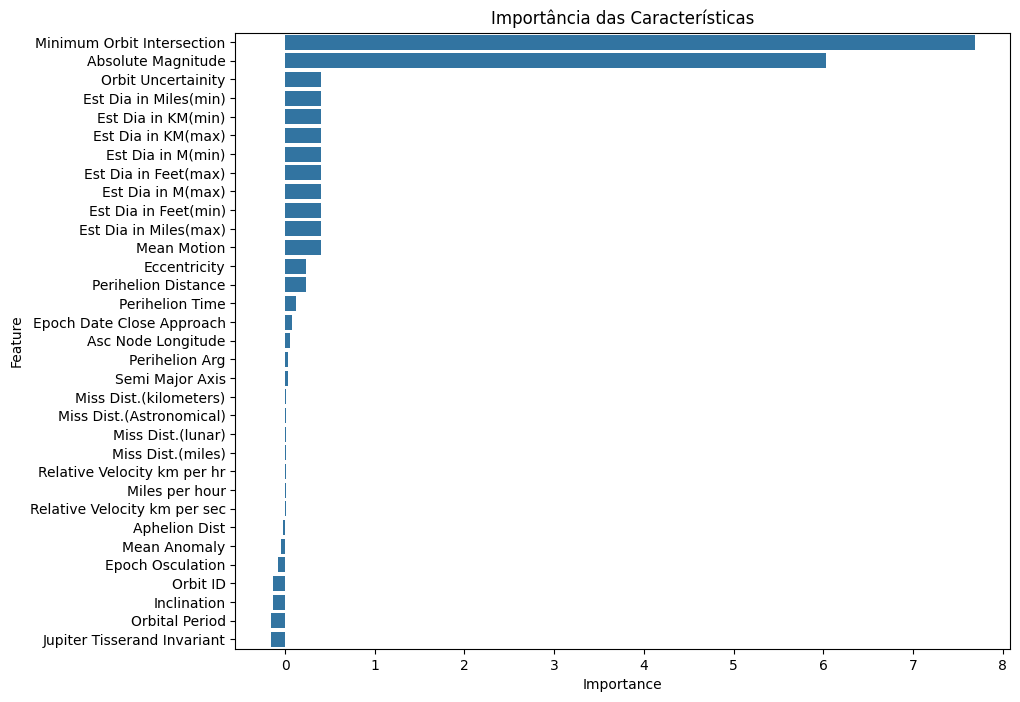

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('asteroids_nasa.csv')

print(df.shape)

print(df.head())

print(df.columns)

print(df.info())

df.drop(['Name', 'Neo Reference ID', 'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox'], axis=1, inplace=True)

df.rename(columns={'Hazardous': 'Class'}, inplace=True)

df['Class'].replace({True: 0, False: 1}, inplace=True)

print(df.isnull().sum())

df = df.dropna()

scaler = StandardScaler()
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

df.loc[:, numeric_features] = scaler.fit_transform(df[numeric_features])

df['Class'] = df['Class'].astype(int)

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(report)

importance = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importância das Características')
plt.show()
